<a href="https://colab.research.google.com/github/JoelVillagomez1220/Simulaci-n-2-/blob/main/Ley_de_Benford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo Ley Benford con numeros Aleatorios

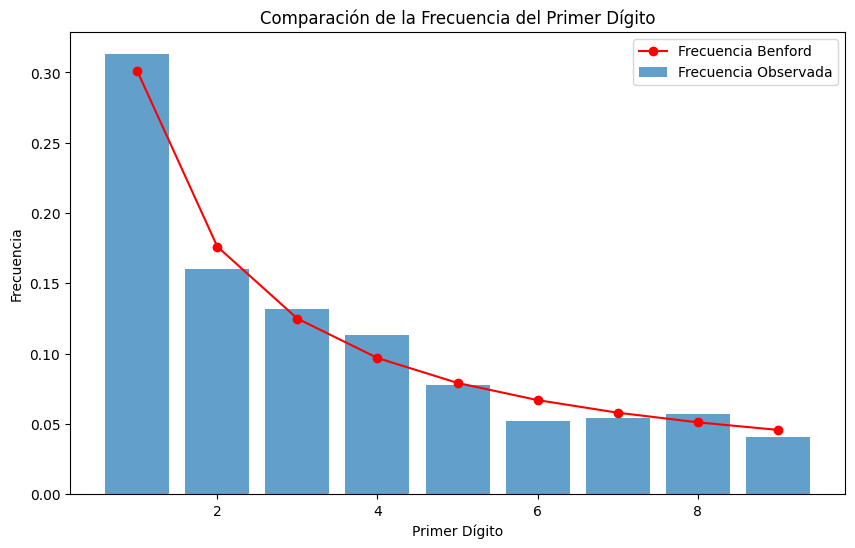

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener el primer dígito
def get_first_digit(x):
    while x >= 10:
        x /= 10
    return int(x)

# Simulación de datos financieros (ingresos anuales de 1000 empresas)
np.random.seed(0)
ingresos = np.random.lognormal(mean=10, sigma=2, size=1000)  # Genera ingresos distribuidos log-normalmente

# Obtener el primer dígito de cada número
first_digits = np.array([get_first_digit(x) for x in ingresos])

# Calcular la frecuencia observada de cada primer dígito
def calculate_frequencies(first_digits):
    unique, counts = np.unique(first_digits, return_counts=True)
    return dict(zip(unique, counts / len(first_digits)))

observed_frequencies = calculate_frequencies(first_digits)

# Distribución esperada según la Ley de Benford
benford_frequencies = {i: np.log10(1 + 1 / i) for i in range(1, 10)}

# Crear un gráfico para comparar las distribuciones
plt.figure(figsize=(10, 6))
plt.bar(observed_frequencies.keys(), observed_frequencies.values(), alpha=0.7, label='Frecuencia Observada')
plt.plot(list(benford_frequencies.keys()), list(benford_frequencies.values()), 'ro-', label='Frecuencia Benford')
plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de la Frecuencia del Primer Dígito')
plt.legend()
plt.show()


# LEY BENFORD CASO PRACTICO

# Librerías Necesarias

In [ ]:
# Instalar librería para trabajar con archivos Excel
!pip install openpyxl

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar Datos Excel

In [ ]:
from google.colab import files

# Subir el archivo Excel
uploaded = files.upload()

# Cargar el archivo Excel en un DataFrame de pandas
df = pd.read_excel(next(iter(uploaded.keys())))

# Mostrar los nombres de las columnas del DataFrame
print(df.columns)

# Mostrar las primeras filas del DataFrame para verificar los datos
df.head()


Saving LeyBendford.xlsx to LeyBendford.xlsx
Index(['CLIENTE', 'CREDIT', 'YEAR_LOAD', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')


,CLIENTE,CREDIT,YEAR_LOAD,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,CLIENTE 1,281.17,2023.0,NaN,NaN,CLIENTE 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLIENTE 1,1328.58,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLIENTE 1,715.75,2023.0,NaN,NaN,2,NaN,1.0,2365.0,0.292336,30.103000,NaN,CLIENTE 1,CLIENTE 1,NaN,CLIENTE 1
3,CLIENTE 1,0.07,2023.0,NaN,NaN,1,NaN,2.0,1363.0,0.168480,17.609126,NaN,CLIENTE 2,CLIENTE 2,NaN,CLIENTE 1
4,CLIENTE 1,0.48,2023.0,NaN,NaN,7,NaN,3.0,1003.0,0.123980,12.493874,NaN,CLIENTE 3,CLIENTE 3,NaN,CLIENTE 1


# Aplicacion Ley de Benford logaritmica

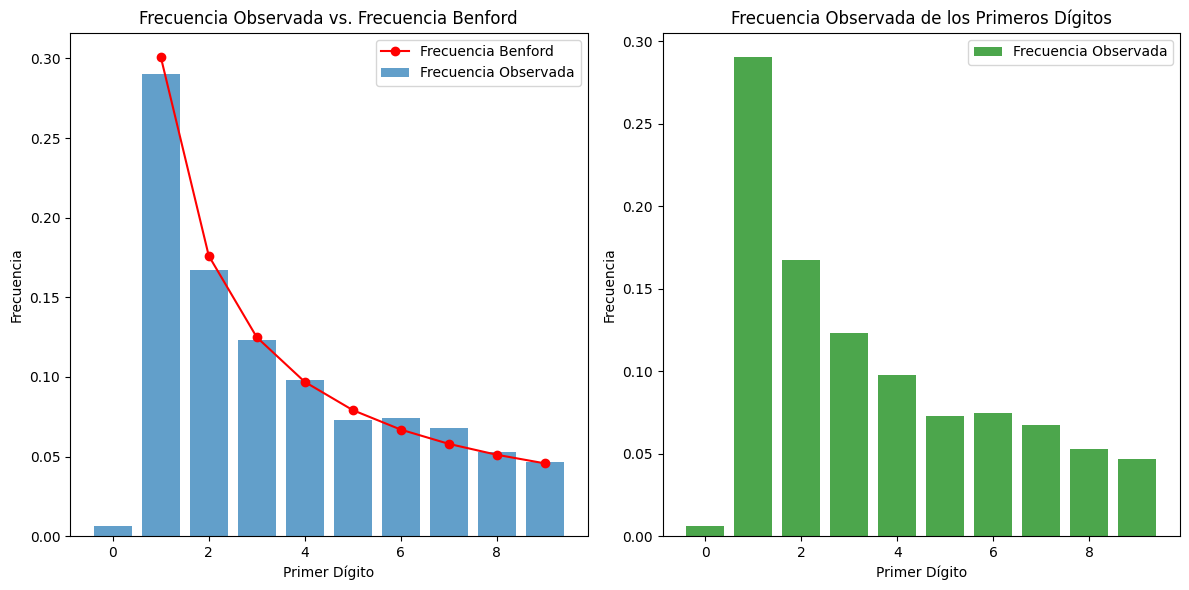

In [ ]:
# Suponiendo que la columna de compras se llama 'Compras'
# Ajusta esto al nombre correcto de la columna si es diferente
purchase_column_name = 'CREDIT'  # Asegúrate de usar el nombre exacto de la columna de compras

# Función para obtener el primer dígito
def get_first_digit(x):
    while x >= 10:
        x /= 10
    return int(x)

# Filtrar datos positivos y no nulos en la columna de compras
purchase_data = df[purchase_column_name].dropna()
purchase_data = purchase_data[purchase_data > 0]

# Obtener el primer dígito de cada compra
first_digits = np.array([get_first_digit(x) for x in purchase_data])

# Calcular la frecuencia observada de cada primer dígito
def calculate_frequencies(first_digits):
    unique, counts = np.unique(first_digits, return_counts=True)
    return dict(zip(unique, counts / len(first_digits)))

observed_frequencies = calculate_frequencies(first_digits)

# Distribución esperada según la Ley de Benford
benford_frequencies = {i: np.log10(1 + 1 / i) for i in range(1, 10)}

# Crear gráficos para comparar las distribuciones
plt.figure(figsize=(12, 6))

# Gráfico 1: Frecuencias Observadas vs. Ley de Benford
plt.subplot(1, 2, 1)
plt.bar(observed_frequencies.keys(), observed_frequencies.values(), alpha=0.7, label='Frecuencia Observada')
plt.plot(list(benford_frequencies.keys()), list(benford_frequencies.values()), 'ro-', label='Frecuencia Benford')
plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Frecuencia Observada vs. Frecuencia Benford')
plt.legend()

# Gráfico 2: Frecuencias Observadas (sin comparación con Benford)
plt.subplot(1, 2, 2)
plt.bar(observed_frequencies.keys(), observed_frequencies.values(), alpha=0.7, color='g', label='Frecuencia Observada')
plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Frecuencia Observada de los Primeros Dígitos')
plt.legend()

plt.tight_layout()
plt.show()


Estadístico KS: 0.3333333333333333
Valor p: 0.7301110654051831


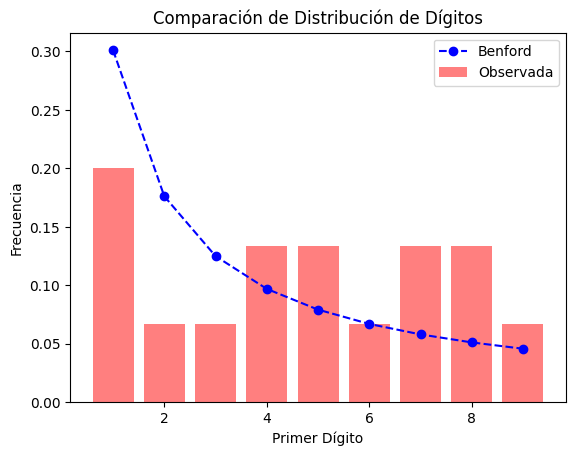

No se puede rechazar la hipótesis nula: los datos siguen la Ley de Benford (sin evidencia de fraude).


In [10]:
#Kolmogorov-Smirnov
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Función para obtener el primer dígito de un número
def primer_digito(x):
    return int(str(x)[0])

# Función para calcular la frecuencia esperada según la Ley de Benford
def distribucion_benford():
    return [np.log10(1 + 1/d) for d in range(1, 10)]

# Datos de ejemplo (nuevos datos)
datos = [1234, 567, 8910, 123, 456, 789, 101, 202, 303, 404, 505, 606, 707, 808, 909]

# Extraer los primeros dígitos de los datos
primeros_digitos = [primer_digito(x) for x in datos]

# Contar la frecuencia de cada primer dígito
frecuencia_observada = [primeros_digitos.count(d) for d in range(1, 10)]

# Normalizar las frecuencias observadas
probabilidad_observada = [f / len(primeros_digitos) for f in frecuencia_observada]

# Frecuencia esperada según la Ley de Benford
probabilidad_esperada = distribucion_benford()

# Realizar la prueba de Kolmogorov-Smirnov
estadistico_ks, valor_p = kstest(probabilidad_observada, probabilidad_esperada)

print(f"Estadístico KS: {estadistico_ks}")
print(f"Valor p: {valor_p}")

# Visualización
plt.bar(range(1, 10), probabilidad_observada, alpha=0.5, label='Observada', color='red')
plt.plot(range(1, 10), probabilidad_esperada, marker='o', linestyle='--', color='blue', label='Benford')
plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribución de Dígitos')
plt.legend()
plt.show()

# Interpretación del valor p
# Nivel de confianza del 5% (α = 0.05)
if valor_p < 0.05:
    print("Se rechaza la hipótesis nula: los datos no siguen la Ley de Benford (posible fraude).")
else:
    print("No se puede rechazar la hipótesis nula: los datos siguen la Ley de Benford (sin evidencia de fraude).")



Estadístico KS: 0.3333333333333333
Valor p: 0.7301110654051831


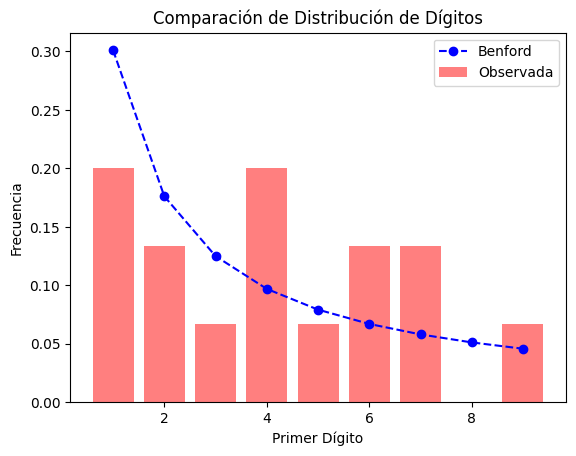

Se rechaza la hipótesis nula: los datos no siguen la Ley de Benford (posible fraude).


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Función para obtener el primer dígito de un número
def primer_digito(x):
    return int(str(x)[0])

# Función para calcular la frecuencia esperada según la Ley de Benford
def distribucion_benford():
    return [np.log10(1 + 1/d) for d in range(1, 10)]

# Nuevos datos para generar discrepancia
datos = [123, 456, 789, 2345, 678, 912, 134, 457, 789, 101, 202, 303, 404, 505, 606]

# Extraer los primeros dígitos de los datos
primeros_digitos = [primer_digito(x) for x in datos]

# Contar la frecuencia de cada primer dígito
frecuencia_observada = [primeros_digitos.count(d) for d in range(1, 10)]

# Normalizar las frecuencias observadas
probabilidad_observada = [f / len(primeros_digitos) for f in frecuencia_observada]

# Frecuencia esperada según la Ley de Benford
probabilidad_esperada = distribucion_benford()

# Realizar la prueba de Kolmogorov-Smirnov
estadistico_ks, valor_p = kstest(probabilidad_observada, probabilidad_esperada)

print(f"Estadístico KS: {estadistico_ks}")
print(f"Valor p: {valor_p}")

# Visualización
plt.bar(range(1, 10), probabilidad_observada, alpha=0.5, label='Observada', color='red')
plt.plot(range(1, 10), probabilidad_esperada, marker='o', linestyle='--', color='blue', label='Benford')
plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribución de Dígitos')
plt.legend()
plt.show()

# Interpretación del valor p
# Nivel de confianza del 5% (α = 0.05)
if valor_p < 0.05:
    print("Se rechaza la hipótesis nula: los datos no siguen la Ley de Benford (posible fraude).")
else:
    print("No se puede rechazar la hipótesis nula: los datos siguen la Ley de Benford (sin evidencia de fraude).")
